# Visualizing Earnings Based on College Majors
### A Dataquest.io guided project

This guided project evaluates data from the American Community Survey (ACS) as cleaned by FiveThirtyEight to perform exploratory visual data analysis on higher education earnings for different college degrees. 

In [14]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [15]:
#Get the data & Clean it
recent_grads = pd.read_csv("recent-grads.csv")
#Check the first row
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [16]:
#Check the data
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [17]:
#Summary statistics of the data
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [18]:
#Matplotlib requires to drop NAs, so let's do that
raw_data_count = recent_grads.shape[0]
print("There are " + str(raw_data_count) + " rows BEFORE cleaning")

There are 173 rows BEFORE cleaning


In [19]:
recent_grads.dropna(inplace = True)
cleaned_data_count = recent_grads.shape[0]
print("There are " + str(cleaned_data_count) + " rows AFTER cleaning")

There are 172 rows AFTER cleaning


### Begin to explore the data using scatter plots
Using Matplotlib scatter plots, begin to visualize different relationships

Using these visualizations we will explore answers to the questions:
 - Do students in more popular majors make more money?
 - Do students that majored in subjects that were majority female make more money?
 - Is there a link between the number of full-time employees and median salary?

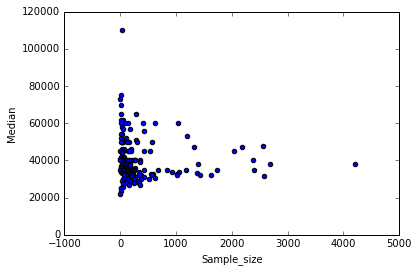

In [20]:
#Compare Sample Size & Median Salary
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

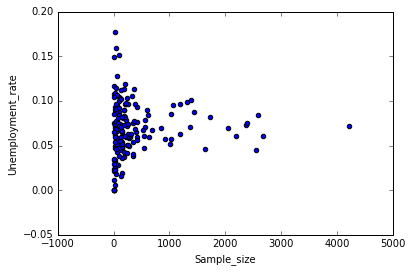

In [21]:
#Compare Sample Size & Unemployment Rate
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

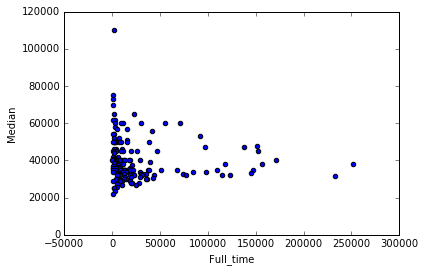

In [22]:
#Compare number of people employed full time & Median Salary
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

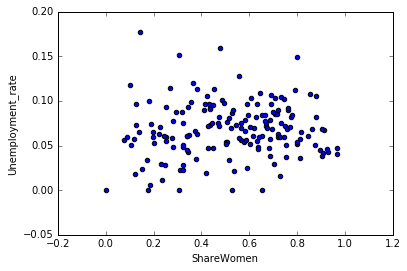

In [23]:
#Compare woman as a share of total enrollment & unemployment Rate
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

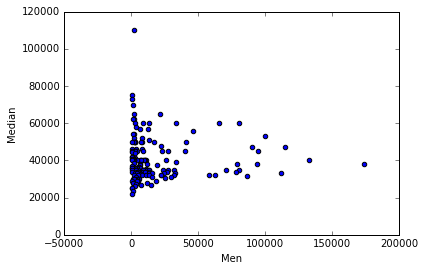

In [24]:
#Compare male graduates and Median income
recent_grads.plot(x='Men', y='Median', kind='scatter')

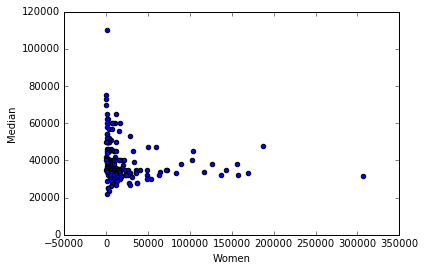

In [25]:
#Compare women graduates and Median income
recent_grads.plot(x='Women', y='Median', kind='scatter')

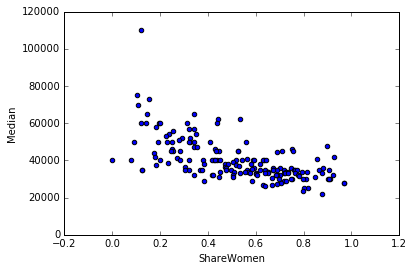

In [26]:
#Compare share women and medianIncome
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')

##### Do students in more popular majors make more money?
By looking at the sample_size v median scatter plot, we can see that as sample size increases there is not a significant change to median income, therefore we might assume that more popular majors does not necessarily indicate an increase in median salary

##### Do students that majord in subjects that were majority female make more money?
By looking at the share women v median salary plot we can see a slight negative trend. As the share of women in a cohort increases, the median salary slightly drops. Therefore we might surmise that the more women in a cohort may indicate a reduced median salary. 

##### Is there a link between number of full-time employees and median salary?
By looking at the full time v median scatter plot we can see that as number of full time workers increases there is not a significant change to median salary, therefore we may assume there is not a connection between median salary and full-time employee counts.

### Exploring different distributions for the datasets
What are the distribution ranges (binned) for different columns in the dataset?

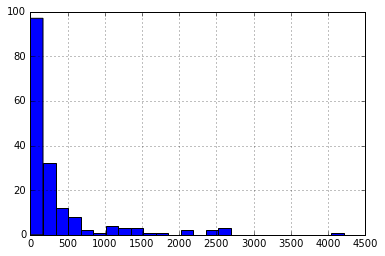

In [31]:
#Distro of the Sample_Size
recent_grads["Sample_size"].hist(bins=25)

We can observe that the sample size distribution is heavily favoured to small sample sizes.

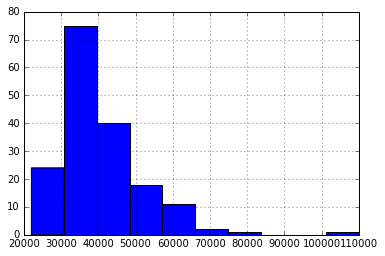

In [33]:
#Median salary distribution
recent_grads["Median"].hist(bins=10)

We observe that median salary tends to cluster in the 30,000-50,000 range. 

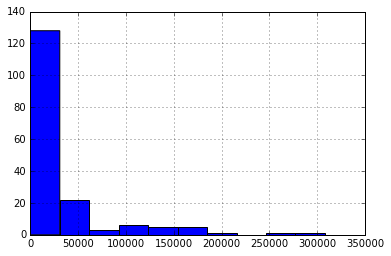

In [35]:
#Employed
recent_grads["Employed"].hist()

We see that there is a large group of recent grads not employed

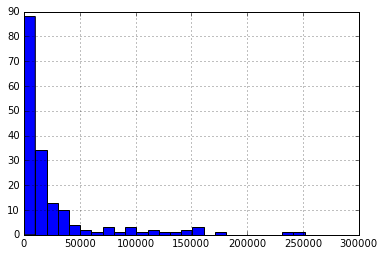

In [36]:
#Full_time
recent_grads["Full_time"].hist(bins=25)

Again we can see that a large group of recent grads are not employed full-time

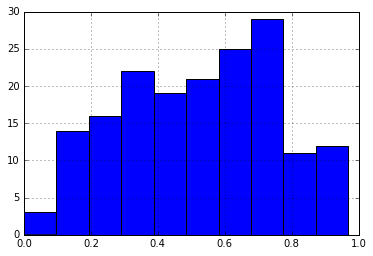

In [38]:
#Share women
recent_grads["ShareWomen"].hist(bins=10)

We see a generally fair distribution of majors with a percentage of women students. Some majors have none, some have only a small percentage, others have a high percentage. No cohorts are entirely women. 

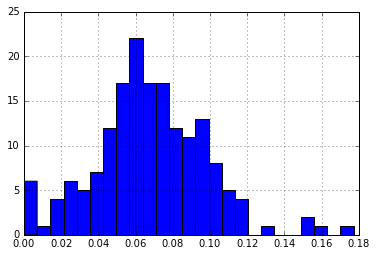

In [39]:
#Unemployment rate distribution
recent_grads["Unemployment_rate"].hist(bins=25)

We can observe a bell curve distribution of unemployment indicating that many majors are seeing a 5-10% unemployment rate

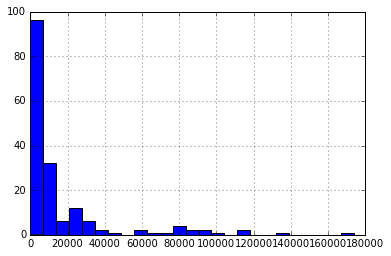

In [42]:
#Men Graduates
recent_grads["Men"].hist(bins=25)

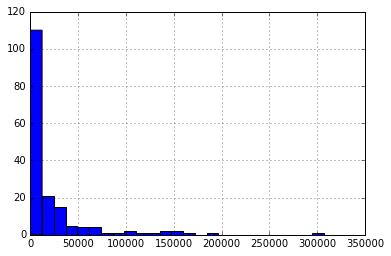

In [43]:
#Women
recent_grads["Women"].hist(bins=25)

### Experimenting with Scatter Matrix Plots

In [44]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08dd4ed9b0>,
      dtype=object)

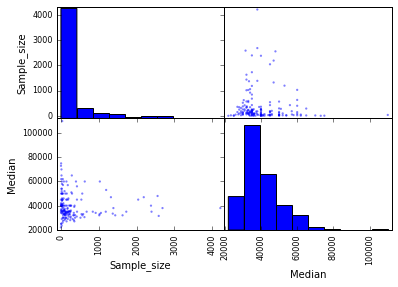

In [45]:
scatter_matrix(recent_grads[["Sample_size", "Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08dd30de48>,
      dtype=object)

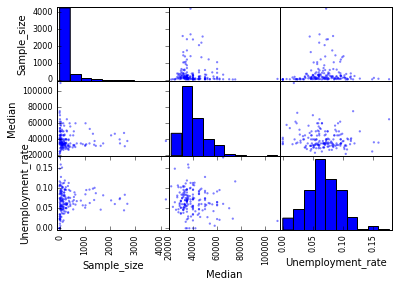

In [46]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]])

Using the scatter matrices we can begin to compare across different criteria. In the examples above we can see that the distribution of unemployment rate is reflected in sample size. That is to say, we may be seeing an unemployment rate bell shape that is reflected in sample size. 

### Experimenting with Bar charts
Using bar charts, visualize some of the college majors for the share of women enrolled in those programs

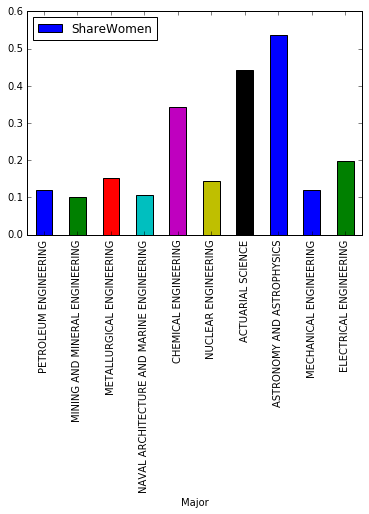

In [48]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

When we evaluate this slice of degrees, we can see that only one major has >50% women (Astrophysics), while most of the engineering programs listed here are 20% or fewer women. 
